In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('CCS_200301_202204 nizampatnam m.csv')

In [3]:
df.head()

,time,Rain
0,2003-01-01,2
1,2003-02-01,0
2,2003-03-01,13
3,2003-04-01,21
4,2003-05-01,67


In [4]:
df.tail()

,time,Rain
227,2021-12-01,0
228,2022-01-01,0
229,2022-02-01,0
230,2022-03-01,1
231,2022-04-01,2


In [5]:
df.columns=["time","Rain"]
df.head()

,time,Rain
0,2003-01-01,2
1,2003-02-01,0
2,2003-03-01,13
3,2003-04-01,21
4,2003-05-01,67


In [6]:
df['time']=pd.to_datetime(df['time'])

In [8]:
df.head()

,time,Rain
0,2003-01-01,2
1,2003-02-01,0
2,2003-03-01,13
3,2003-04-01,21
4,2003-05-01,67


In [9]:
df.set_index('time',inplace=True)

In [10]:
df.head()

,Rain
time,
2003-01-01,2
2003-02-01,0
2003-03-01,13
2003-04-01,21
2003-05-01,67


In [11]:
df.describe()

,Rain
count,232.000000
mean,134.150862
std,162.143805
min,0.000000
25%,2.750000
50%,79.500000
75%,223.500000
max,953.000000


In [12]:
from statsmodels.tsa.stattools import adfuller

In [13]:
test_result=adfuller(df['Rain'])

In [14]:
def adfuller_test(Rain):
    result=adfuller(Rain)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [15]:
adfuller_test(df['Rain'])

ADF Test Statistic : -4.521142441567119
p-value : 0.0001800475962096467
#Lags Used : 15
Number of Observations Used : 216
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [16]:
df['Sales First Difference'] = df['Rain'] - df['Rain'].shift(1)

In [17]:
df['Rain'].shift(1)

time
2003-01-01      NaN
2003-02-01      2.0
2003-03-01      0.0
2003-04-01     13.0
2003-05-01     21.0
              ...  
2021-12-01    335.0
2022-01-01      0.0
2022-02-01      0.0
2022-03-01      0.0
2022-04-01      1.0
Name: Rain, Length: 232, dtype: float64

In [18]:
df['Seasonal First Difference']=df['Rain']-df['Rain'].shift(12)

In [19]:
df.head(14)

,Rain,Sales First Difference,Seasonal First Difference
time,,,
2003-01-01,2,NaN,NaN
2003-02-01,0,-2.0,NaN
2003-03-01,13,13.0,NaN
2003-04-01,21,8.0,NaN
2003-05-01,67,46.0,NaN
2003-06-01,298,231.0,NaN
2003-07-01,338,40.0,NaN
2003-08-01,152,-186.0,NaN
2003-09-01,215,63.0,NaN


In [20]:
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -7.792167275786219
p-value : 7.888905798879745e-12
#Lags Used : 11
Number of Observations Used : 208
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<AxesSubplot:xlabel='time'>

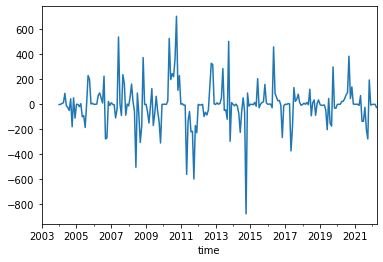

In [21]:
df['Seasonal First Difference'].plot()

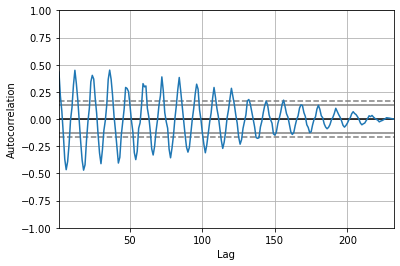

In [22]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Rain'])
plt.show()

In [23]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

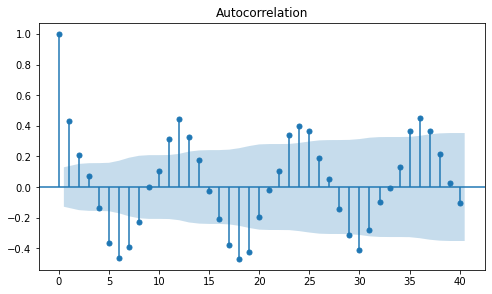

In [24]:
fig = plt.figure(figsize=(8,10))
ax1 = fig.add_subplot(211)
fig = plot_acf(df['Rain'].iloc[1:],lags=40,ax=ax1)

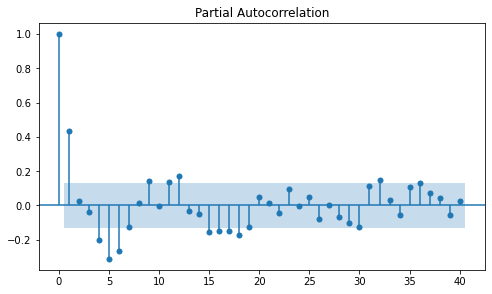

In [25]:
fig = plt.figure(figsize=(8,10))
ax2 = fig.add_subplot(211)
fig = plot_pacf(df['Rain'].iloc[1:],lags=40,ax=ax2)

In [26]:
from statsmodels.tsa.arima_model import ARIMA

In [27]:
model=ARIMA(df['Rain'],order=(1,1,0))
model_fit=model.fit()

C:\Users\IJ1327\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\IJ1327\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS 

In [28]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                 D.Rain   No. Observations:                  231
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -1506.009
Method:                       css-mle   S.D. of innovations            164.083
Date:                Wed, 18 May 2022   AIC                           3018.018
Time:                        14:30:44   BIC                           3028.346
Sample:                    02-01-2003   HQIC                          3022.184
                         - 04-01-2022                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         6.402e-06      8.290   7.72e-07      1.000     -16.248      16.248
ar.L1.D.Rain    -0.3036      0.062     -4.857      0.000      -0.426      -0.181
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -3.2939           +0.0000j            3.2939            0.5000
-----------------------------------------------------------------------------
"""

<AxesSubplot:xlabel='time'>

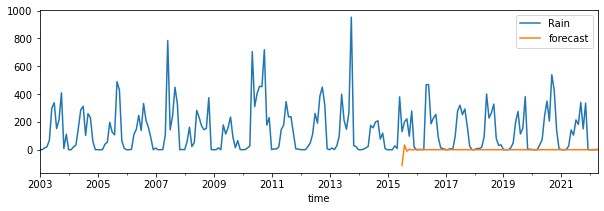

In [29]:
df['forecast']=model_fit.predict(start=150,end=231,dynamic=True)
df[['Rain','forecast']].plot(figsize=(10,3))

In [30]:
import statsmodels.api as sm

In [31]:
model=sm.tsa.statespace.SARIMAX(df['Rain'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

C:\Users\IJ1327\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\IJ1327\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


<AxesSubplot:xlabel='time'>

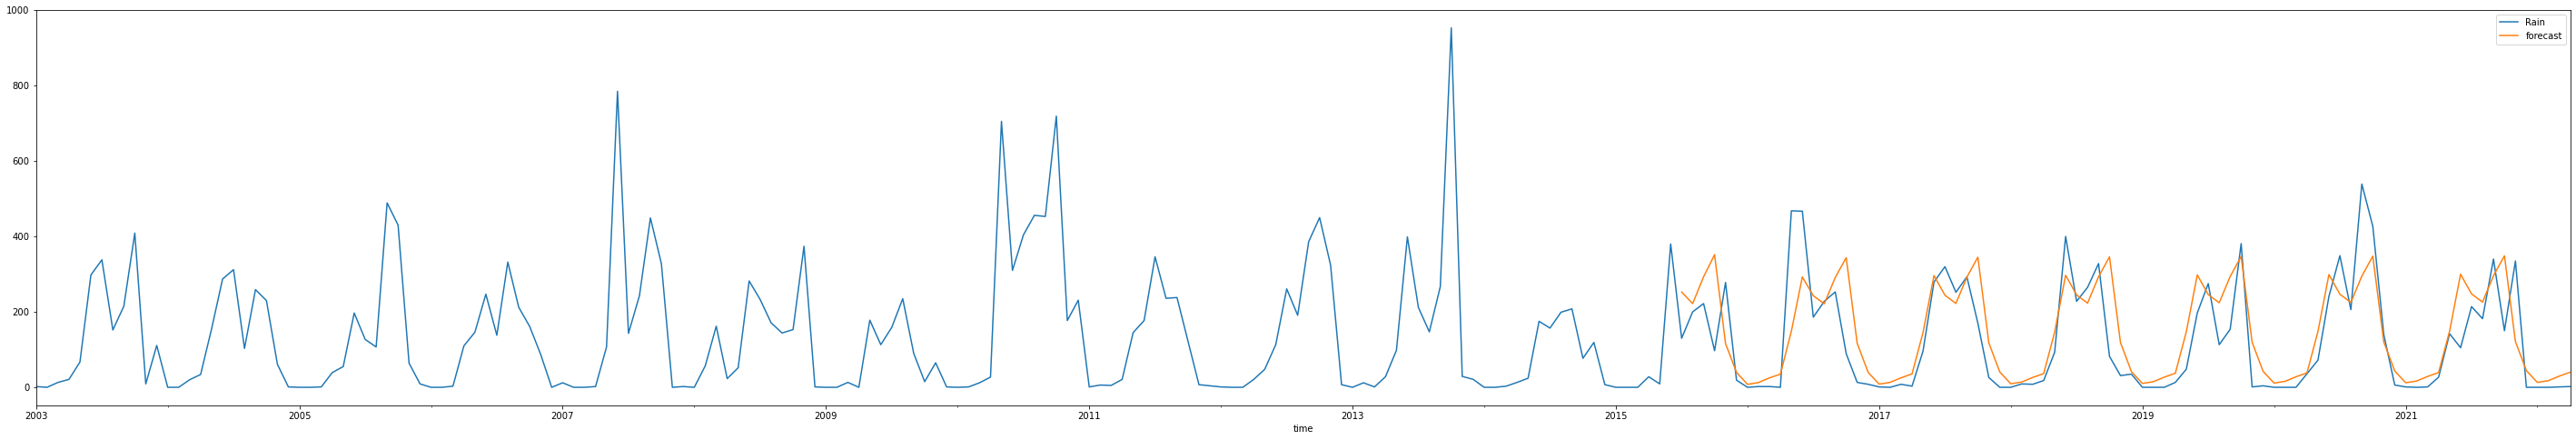

In [32]:
df['forecast']=results.predict(start=150,end=231,dynamic=True)
df[['Rain','forecast']].plot(figsize=(50,8))

In [33]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,60)]

In [34]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [35]:
future_datest_df.tail()

,Rain,Sales First Difference,Seasonal First Difference,forecast
2026-11-01,NaN,NaN,NaN,NaN
2026-12-01,NaN,NaN,NaN,NaN
2027-01-01,NaN,NaN,NaN,NaN
2027-02-01,NaN,NaN,NaN,NaN
2027-03-01,NaN,NaN,NaN,NaN


In [36]:
future_df=pd.concat([df,future_datest_df])

<AxesSubplot:>

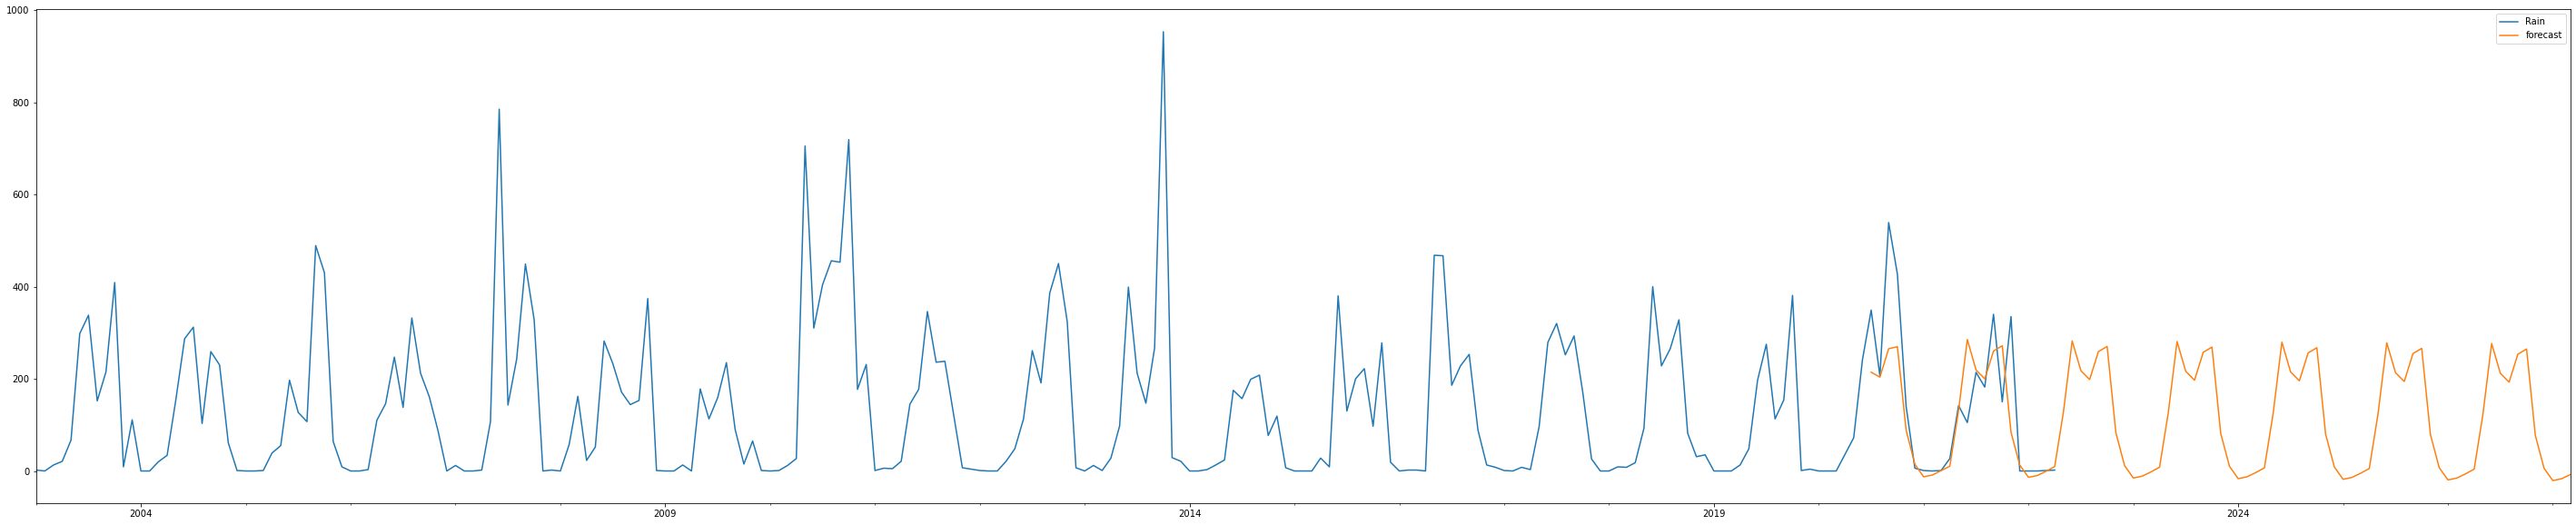

In [37]:
future_df['forecast'] = results.predict(start = 210, end = 291, dynamic= True)  
future_df[['Rain','forecast']].plot(figsize=(50,10))

In [38]:
future_df['forecast'].tail(60)

2022-04-01      9.613238
2022-05-01    128.007998
2022-06-01    282.206763
2022-07-01    217.519582
2022-08-01    198.398077
2022-09-01    258.939213
2022-10-01    270.248522
2022-11-01     82.882429
2022-12-01     11.512476
2023-01-01    -15.192971
2023-02-01    -11.300754
2023-03-01     -2.177270
2023-04-01      8.184039
2023-05-01    126.663670
2023-06-01    280.847189
2023-07-01    216.120988
2023-08-01    196.990687
2023-09-01    257.530794
2023-10-01    268.847075
2023-11-01     81.474718
2023-12-01     10.107182
2024-01-01    -16.597528
2024-02-01    -12.705437
2024-03-01     -3.582249
2024-04-01      6.779893
2024-05-01    125.256843
2024-06-01    279.440844
2024-07-01    214.715875
2024-08-01    195.585852
2024-09-01    256.125991
2024-10-01    267.442052
2024-11-01     80.069893
2024-12-01      8.702280
2025-01-01    -18.002452
2025-02-01    -14.110357
2025-03-01     -4.987161
2025-04-01      5.374955
2025-05-01    123.851990
2025-06-01    278.035975
2025-07-01    213.310967
